# PROBLEM STATEMENT - 

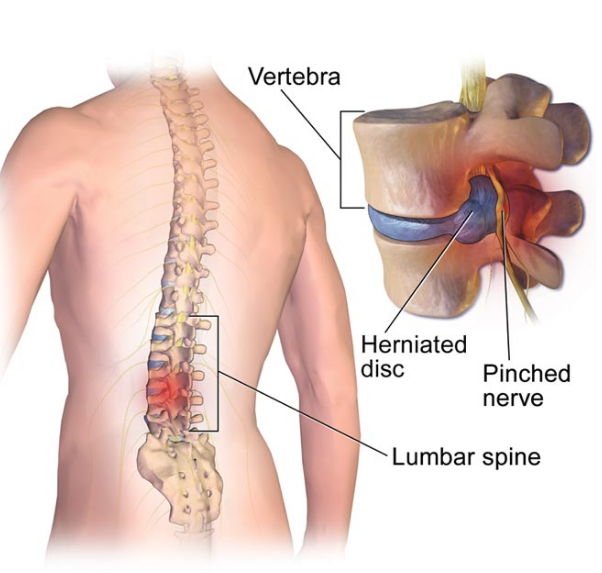

# STEP 0: LIBRARIES IMPORT

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP 1: IMPORT DATASET

In [140]:
training_set=pd.read_csv("column_2C_weka.csv")

In [141]:
training_set

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [142]:
training_set.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.322581
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [143]:
training_set.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [144]:
training_set.tail()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


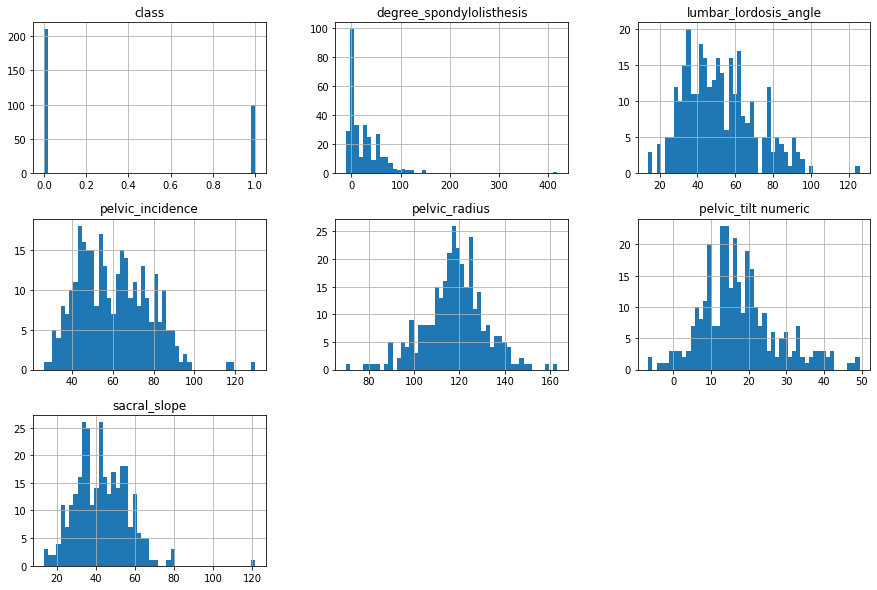

In [147]:
training_set.hist(bins=50, figsize=(15,10));

# Data Preprocessing

In [88]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    
    for i in features:
        
        Q1 = np.percentile(data[i],25)
        Q3 = np.percentile(data[i],75)
        
        IQR = Q3-Q1
        
        outlier_step = IQR*1.5
        
        outlier_list_cols = data[(data[i] < Q1-outlier_step) | (data[i]>Q3+outlier_step)].index
        
        outlier_indices.extend(outlier_list_cols)
        
        
    outlier_indices = Counter(outlier_indices)
    
    multiple_outliers = list(c for c,k in outlier_indices.items() if k>2)
    
    return multiple_outliers

In [91]:
training_set.loc[detect_outliers(training_set,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,0
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,0


In [95]:
training_set = training_set.drop(detect_outliers(training_set,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']), axis=0).reset_index(drop = True)

In [96]:
training_set.loc[detect_outliers(training_set,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'])]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [97]:
training_set.columns[training_set.isnull().any()]

Index([], dtype='object')

# STEP 2: EXPLORE/VISUALIZE DATASET

In [98]:
normal = training_set[training_set['class']==1]
abnormal = training_set[training_set['class']==0]

In [99]:
print("Total =", len(training_set))

print("Number of patients tested normal =", len(normal))
print("Percentage  =", 1.*len(normal)/len(training_set)*100.0, "%")
 
print("Number of patients tested abnormal =", len(abnormal))
print("Percentage =", 1.*len(abnormal)/len(training_set)*100.0, "%")
 

Total = 308
Number of patients tested normal = 100
Percentage  = 32.467532467532465 %
Number of patients tested abnormal = 208
Percentage = 67.53246753246754 %


C:\Users\RITIKA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


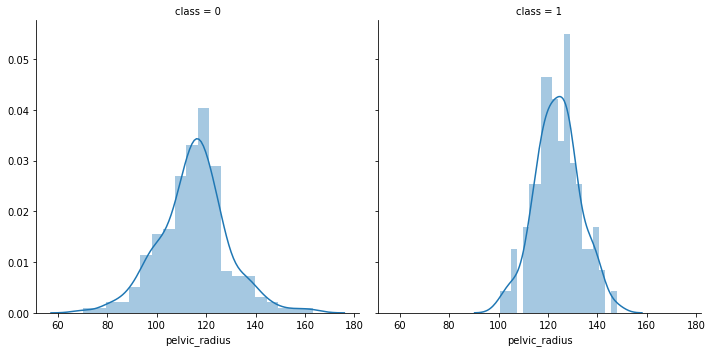

pelvic_radius < 100 and pelvic_radius > 150 people are more likely to be Abnormal


In [100]:
g = sns.FacetGrid(training_set, col = "class",size=5)
g.map(sns.distplot, "pelvic_radius", bins = 20)
plt.show()
print("pelvic_radius < 100 and pelvic_radius > 150 people are more likely to be Abnormal")

C:\Users\RITIKA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


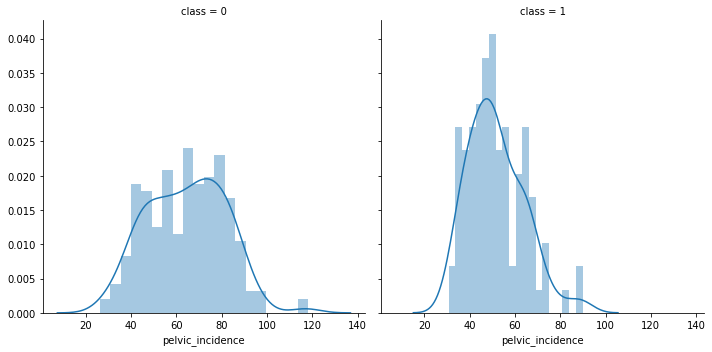

pelvic_incidence between 40-60 value more likely belong to people who are Normal,
People who has higher pelvic_radius value like >95 are Abnormal


In [101]:
g = sns.FacetGrid(training_set, col = "class",size=5)
g.map(sns.distplot, "pelvic_incidence", bins = 20)
plt.show()
print("pelvic_incidence between 40-60 value more likely belong to people who are Normal,\nPeople who has higher pelvic_radius value like >95 are Abnormal")

C:\Users\RITIKA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


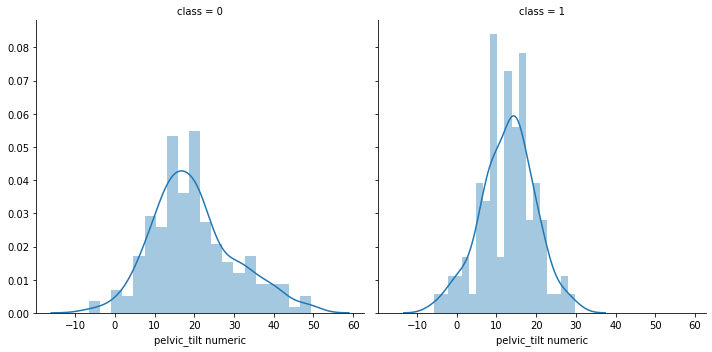

People who has pelvic_tilt numeric values more than 30 are Abnormal,


In [102]:
g = sns.FacetGrid(training_set, col = "class",size=5)
g.map(sns.distplot, "pelvic_tilt numeric", bins = 20)
plt.show()
print("People who has pelvic_tilt numeric values more than 30 are Abnormal,")

C:\Users\RITIKA\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


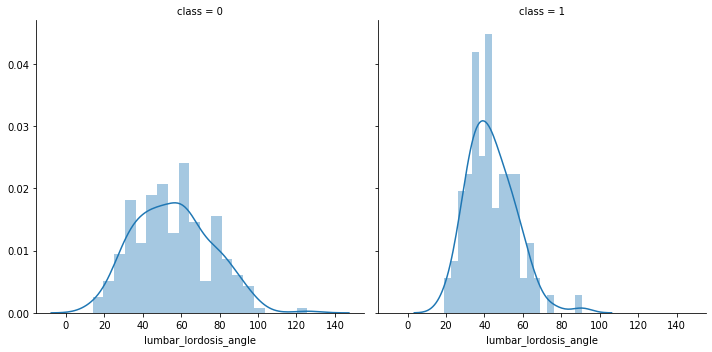

lumbar_lordosis_angle > 80 means to high chance to be Abnormal


In [103]:
g = sns.FacetGrid(training_set, col = "class",size=5)
g.map(sns.distplot, "lumbar_lordosis_angle", bins = 20)
plt.show()
print("lumbar_lordosis_angle > 80 means to high chance to be Abnormal")

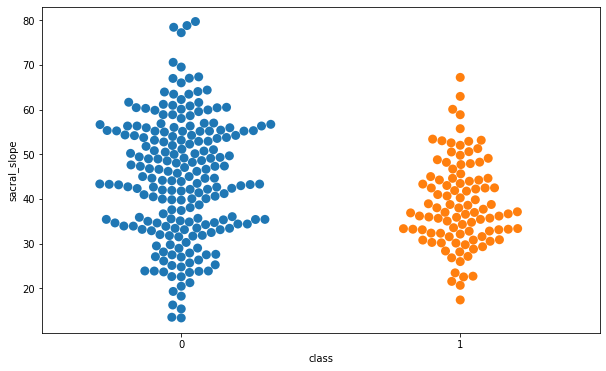

sacral_slope and class are negative correlated. Means that if sacral_slope increase people becoming Abnormal.
sacral_slope > 68 people are Abnormal.


In [104]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="class", y="sacral_slope", data=training_set, ax=ax,size=9)
plt.show()
print("sacral_slope and class are negative correlated. Means that if sacral_slope increase people becoming Abnormal.\nsacral_slope > 68 people are Abnormal.")

C:\Users\RITIKA\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


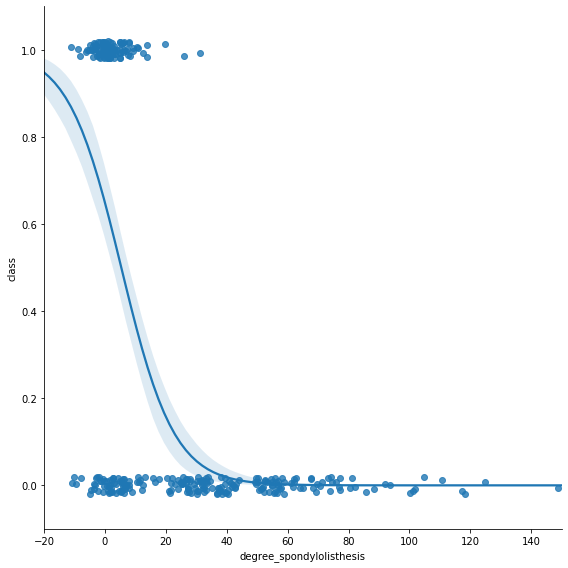

degree_spondylolisthesis > 20 people are Abnormal
We can use this feature for training.


In [105]:
g = sns.lmplot(x="degree_spondylolisthesis", y="class", data=training_set, y_jitter=.02, logistic=True, truncate=False,size=8)
g.set(xlim=(-20, 150), ylim=(-0.1, 1.1))
plt.show()
print("degree_spondylolisthesis > 20 people are Abnormal\nWe can use this feature for training.")

In [106]:
training_set.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.660981,0.739166,0.808345,-0.250889,0.651888,-0.353173
pelvic_tilt numeric,0.660981,1.000000,0.430512,0.092531,0.014086,0.523281,-0.326695
lumbar_lordosis_angle,0.739166,0.430512,1.000000,0.643052,-0.088275,0.679435,-0.311841
sacral_slope,0.808345,0.092531,0.643052,1.000000,-0.343955,0.454464,-0.212325
pelvic_radius,-0.250889,0.014086,-0.088275,-0.343955,1.000000,-0.030833,0.316804
degree_spondylolisthesis,0.651888,0.523281,0.679435,0.454464,-0.030833,1.000000,-0.528680
class,-0.353173,-0.326695,-0.311841,-0.212325,0.316804,-0.528680,1.000000


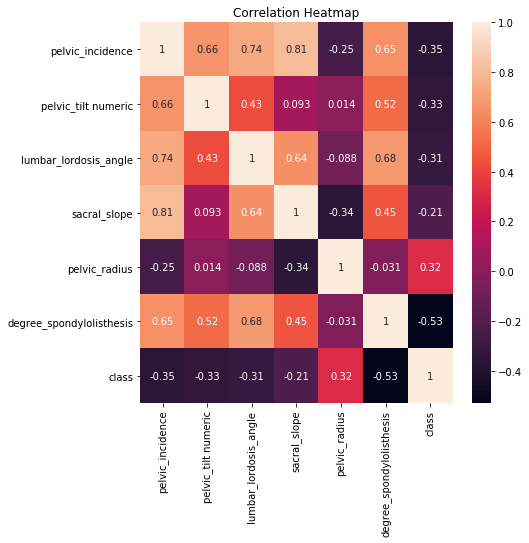

In [107]:
plt.figure(figsize=(7,7))
sns.heatmap(training_set.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [108]:
X = training_set.iloc[:,:-1]  #independent columns
y = training_set.iloc[:,-1]

In [109]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

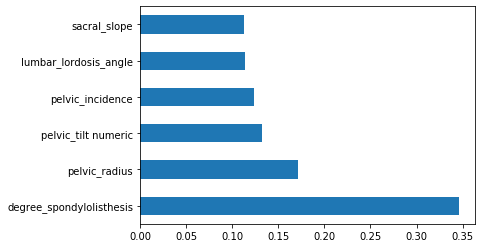

In [111]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# STEP 3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [112]:
training_set

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
303,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
304,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
305,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
306,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [113]:
#Let's drop the columns other than pelvic_radius and degree_spondylolisthesis which we will use for classification
training_set.drop(['sacral_slope','lumbar_lordosis_angle','pelvic_incidence','pelvic_tilt numeric'],axis=1,inplace=True)

In [114]:
X = training_set.iloc[:,:-1]  #independent columns
y = training_set.iloc[:,-1]

# STEP 4: MODEL TRAINING

In [115]:
from sklearn.model_selection import train_test_split
X_train_us, X_test_us, y_train, y_test = train_test_split(X, y, test_size = 1/3.0)

In [116]:
X_train_us

,pelvic_radius,degree_spondylolisthesis
269,120.631941,7.876731
47,113.266675,-4.497958
40,106.938852,-3.460358
107,110.644021,42.608076
297,110.708958,6.079338
...,...,...
249,139.247150,0.668557
110,126.912990,71.321175
208,127.632875,7.986683
255,131.802491,-8.290203


In [117]:
y_train

269    1
47     0
40     0
107    0
297    1
      ..
249    1
110    0
208    1
255    1
258    1
Name: class, Length: 205, dtype: int64

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_us)
X_test = sc.fit_transform(X_test_us)

In [119]:
X_train.shape

(205, 2)

In [30]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP 5: MODEL TESTING

In [31]:

y_proba = classifier.predict_proba(X_train)
y_proba

array([[4.04748914e-01, 5.95251086e-01],
       [9.98043405e-01, 1.95659466e-03],
       [9.47974430e-01, 5.20255697e-02],
       [8.09728221e-01, 1.90271779e-01],
       [4.68173618e-01, 5.31826382e-01],
       [4.64940495e-01, 5.35059505e-01],
       [2.14184208e-01, 7.85815792e-01],
       [3.70114208e-01, 6.29885792e-01],
       [9.97913489e-01, 2.08651128e-03],
       [6.96828896e-01, 3.03171104e-01],
       [3.14208619e-01, 6.85791381e-01],
       [9.94963300e-01, 5.03670046e-03],
       [4.59718474e-01, 5.40281526e-01],
       [2.47320819e-01, 7.52679181e-01],
       [8.89670409e-01, 1.10329591e-01],
       [9.93082144e-01, 6.91785629e-03],
       [3.85329996e-01, 6.14670004e-01],
       [3.99152654e-01, 6.00847346e-01],
       [9.99780364e-01, 2.19636028e-04],
       [2.90782388e-01, 7.09217612e-01],
       [9.18460236e-01, 8.15397637e-02],
       [6.27496156e-01, 3.72503844e-01],
       [8.46762073e-01, 1.53237927e-01],
       [5.00248480e-01, 4.99751520e-01],
       [6.351015

In [32]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [33]:
y_train

264    1
80     0
147    0
171    0
272    1
      ..
161    0
135    0
131    0
140    0
29     0
Name: class, Length: 206, dtype: int64

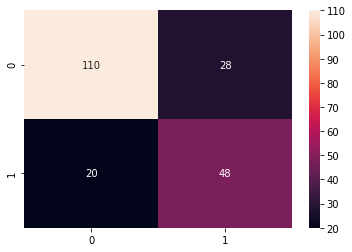

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")   

In [35]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_test

219    1
50     0
54     0
110    0
201    0
      ..
30     0
160    0
216    1
73     0
44     0
Name: class, Length: 104, dtype: int64

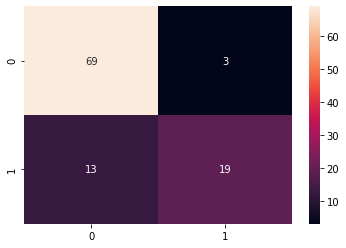

In [37]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        72
           1       0.86      0.59      0.70        32

    accuracy                           0.85       104
   macro avg       0.85      0.78      0.80       104
weighted avg       0.85      0.85      0.84       104



In [39]:
from sklearn import metrics

In [40]:
print("accuracy:",metrics.accuracy_score(y_test,y_predict_test))

accuracy: 0.8461538461538461


In [41]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test,y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())


-0.3261534722849755 0.10458060271951879


C:\Users\RITIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# STEP 6: VISUALIZING TRAINING AND TESTING DATASETS

In [42]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

In [43]:
y_train.shape

(206,)

In [44]:
X_train.shape

(206, 2)

In [45]:
X1.shape

(683, 898)

(-2.2237620175188955, 4.596237982480959)

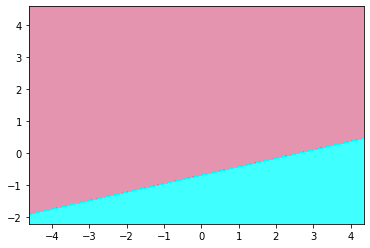

In [46]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be pale red, and if it is classified as 1 it will be shown in cyan 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


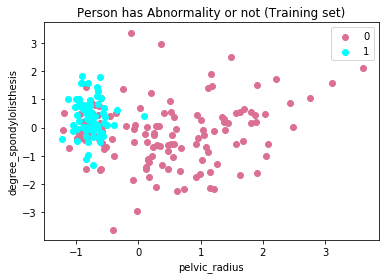

In [47]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
    
plt.title('Person has Abnormality or not (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


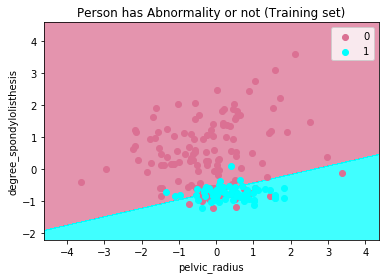

In [48]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Person has Abnormality or not (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


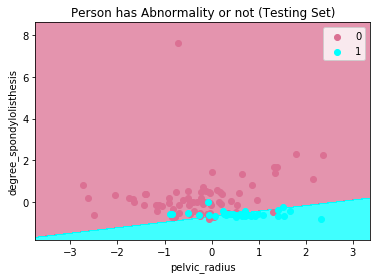

In [49]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Person has Abnormality or not (Testing Set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

# Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression
l_train = X_train_us['pelvic_radius'].values.reshape(-1,1)
m_train= X_train_us['degree_spondylolisthesis'].values.reshape(-1,1)

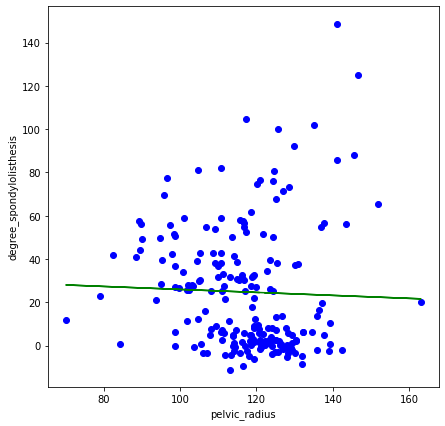

In [149]:
reg = LinearRegression()
reg.fit(l_train, m_train)
predictions = reg.predict(l_train)
plt.figure(figsize=(7,7))
plt.scatter(X_train_us['pelvic_radius'],X_train_us['degree_spondylolisthesis'],c='blue')
plt.plot(X_train_us['pelvic_radius'],predictions,c='green')
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error
rmse =np.sqrt(mean_squared_error(l_train,m_train))
print(rmse)

97.81706691457644


In [160]:
import statsmodels.api as sm
model = sm.OLS(m_train,l_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.421
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              148.1
Date:                Tue, 05 May 2020   Prob (F-statistic):                    5.72e-26
Time:                        13:38:58   Log-Likelihood:                         -979.59
No. Observations:                 205   AIC:                                      1961.
Df Residuals:                     204   BIC:                                      1965.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [161]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-0.06890782]]


In [162]:
l_test = X_test_us['pelvic_radius'].values.reshape(-1,1)
m_test= X_test_us['degree_spondylolisthesis'].values.reshape(-1,1)

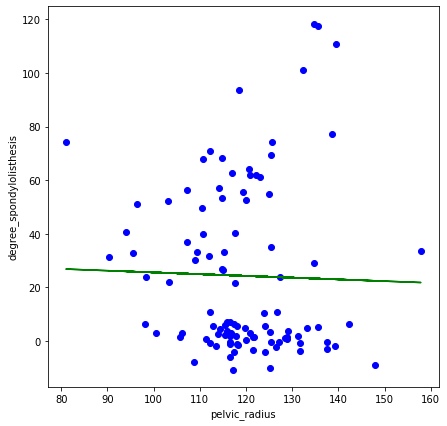

In [163]:
reg = LinearRegression()
reg.fit(l_test, m_test)
predictions = reg.predict(l_test)
plt.figure(figsize=(7,7))
plt.scatter(X_test_us['pelvic_radius'],X_test_us['degree_spondylolisthesis'],c='blue')
plt.plot(X_test_us['pelvic_radius'],predictions,c='green')
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error
rmse =np.sqrt(mean_squared_error(l_test,m_test))
print(rmse)

100.63285155146494


In [129]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-0.06526461]]


In [166]:
model = sm.OLS(m_test,l_test)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.372
Model:                            OLS   Adj. R-squared (uncentered):              0.366
Method:                 Least Squares   F-statistic:                              60.48
Date:                Tue, 05 May 2020   Prob (F-statistic):                    6.20e-12
Time:                        13:40:01   Log-Likelihood:                         -500.92
No. Observations:                 103   AIC:                                      1004.
Df Residuals:                     102   BIC:                                      1006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Polynomial Regression

In [172]:
#fitting polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree=2)
m_polynomial=polynomial_regressor.fit_transform(l_train)
linear_regressor_2= LinearRegression()
linear_regressor_2.fit(m_polynomial,m_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

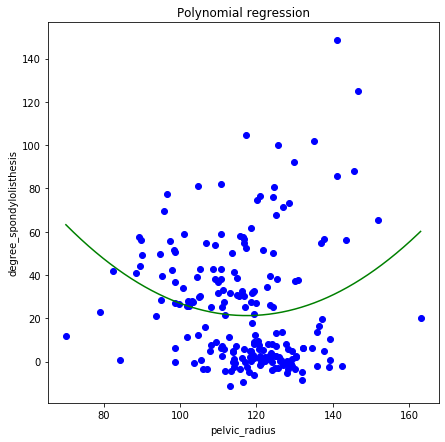

In [173]:
X_grid = np.arange(min(l_train), max(l_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(7,7))
plt.scatter(l_train,m_train,color='blue')
plt.plot(X_grid,linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'green')
plt.title('Polynomial regression')
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

In [174]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)

X_pf=pf.fit_transform(l_train)

lr=LinearRegression()

lr.fit(X_pf,m_train)

pred=lr.predict(X_pf)

rmse =np.sqrt(mean_squared_error(m_train,pred))
r2 = r2_score(m_train,pred)
print(rmse)
print(r2)

27.92414983749115
0.04256730058023972


In [134]:
polynomial_regressor = PolynomialFeatures(degree=2)
m_polynomial=polynomial_regressor.fit_transform(l_test)
linear_regressor_2= LinearRegression()
linear_regressor_2.fit(m_polynomial,m_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

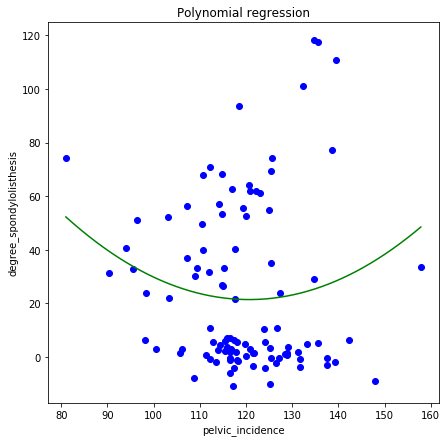

In [135]:
X_grid = np.arange(min(l_test), max(l_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(7,7))
plt.scatter(l_test,m_test,c='blue')
plt.plot(X_grid,linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'green')
plt.title('Polynomial regression')
plt.xlabel("pelvic_incidence")
plt.ylabel("degree_spondylolisthesis")
plt.show()

In [136]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)

X_pf=pf.fit_transform(l_test)

lr=LinearRegression()

lr.fit(X_pf,m_test)

pred=lr.predict(X_pf)

rmse =np.sqrt(mean_squared_error(m_test,pred))
r2 = r2_score(m_test,pred)
print(rmse)
print(r2)

30.54642771495063
0.03931981335710666


# Decision Tree

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_test, y_test);
print(gs_DT.best_params_,gs_DT.best_score_)

Fitting 15 folds for each of 32 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2} 0.8693650793650796


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.5s finished


In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_split= 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

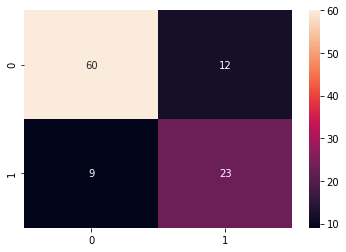

In [70]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        72
           1       0.66      0.72      0.69        32

    accuracy                           0.80       104
   macro avg       0.76      0.78      0.77       104
weighted avg       0.80      0.80      0.80       104



In [72]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeClassifier(criterion = 'entropy')
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test,y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-4.333101011186309 2.6074605363118852


C:\Users\RITIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [73]:
y = training_set['class'].values
x_data = training_set.drop(["class"],axis=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


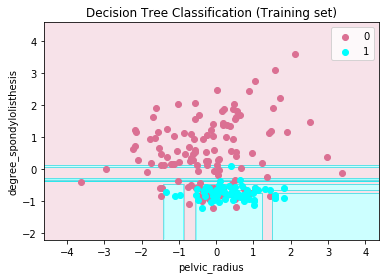

In [74]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


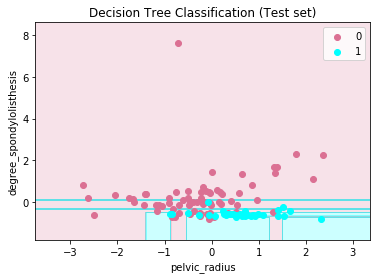

In [75]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

# NAIVE BAYES


In [76]:
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test,y_test)
print(gs_NB.best_params_,gs_NB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'var_smoothing': 0.533669923120631} 0.8787301587301588


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.0s finished


In [116]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(var_smoothing= 0.533669923120631)
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.533669923120631)

In [117]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

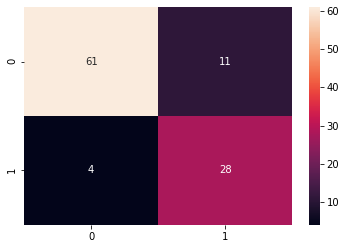

In [118]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.72      0.88      0.79        32

    accuracy                           0.86       104
   macro avg       0.83      0.86      0.84       104
weighted avg       0.87      0.86      0.86       104



In [120]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GaussianNB()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test,y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-0.4088794697163234 0.28478724061894567


C:\Users\RITIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


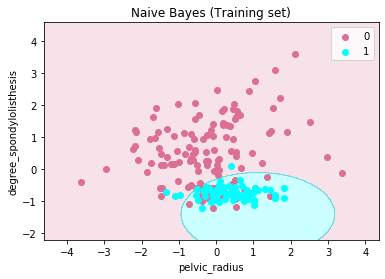

In [121]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


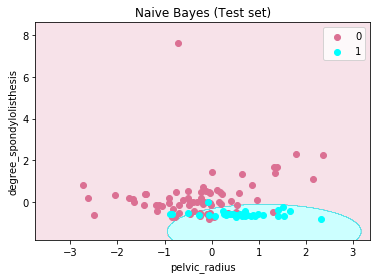

In [122]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

# KNN

In [85]:
error_rate = []
from sklearn.neighbors import KNeighborsClassifier
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

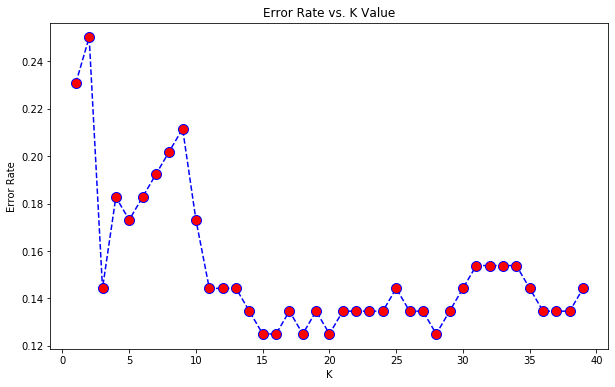

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [146]:
# Fitting KNN to the Training set

classifier = KNeighborsClassifier(n_neighbors= 15)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [148]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [108]:
y_train

264    1
80     0
147    0
171    0
272    1
      ..
161    0
135    0
131    0
140    0
29     0
Name: class, Length: 206, dtype: int64

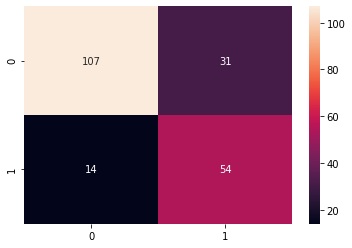

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d") 

In [110]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

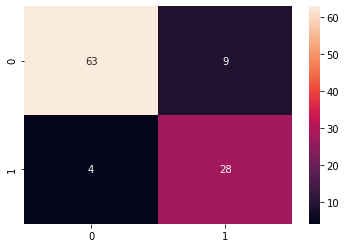

In [111]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        72
           1       0.76      0.88      0.81        32

    accuracy                           0.88       104
   macro avg       0.85      0.88      0.86       104
weighted avg       0.88      0.88      0.88       104



In [113]:
print("ACUURACY:",metrics.accuracy_score(y_test,y_predict_test))

ACUURACY: 0.875


In [96]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsClassifier(n_neighbors=2)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test,y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-2.825947097501809 1.9295631838290788


C:\Users\RITIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


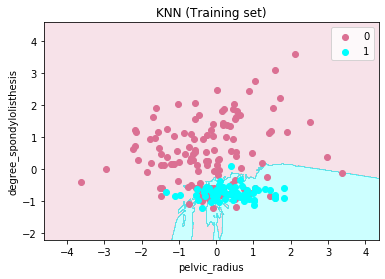

In [114]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


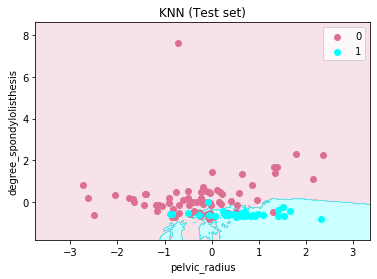

In [115]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

# SVM

In [123]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.868485 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [143]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, gamma='scale', kernel= 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [126]:
y_train

264    1
80     0
147    0
171    0
272    1
      ..
161    0
135    0
131    0
140    0
29     0
Name: class, Length: 206, dtype: int64

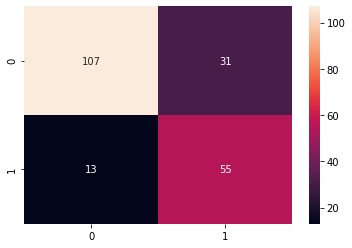

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [128]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

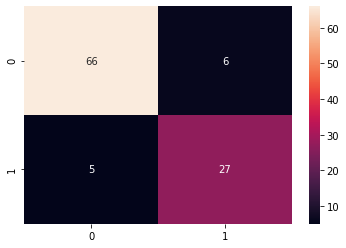

In [129]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        72
           1       0.82      0.84      0.83        32

    accuracy                           0.89       104
   macro avg       0.87      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



In [131]:
from sklearn import metrics
print("ACUURACY:",metrics.accuracy_score(y_test,y_predict_test))

ACUURACY: 0.8942307692307693


In [134]:
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = SVC(probability=True)
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test,y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-0.3493102883860647 0.15391179776456124


C:\Users\RITIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


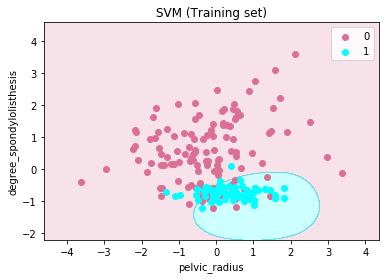

In [135]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


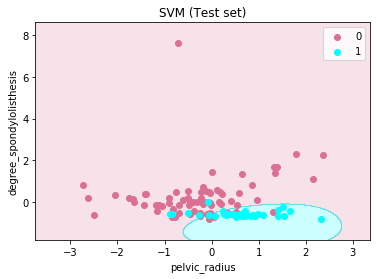

In [136]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('palevioletred', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('palevioletred', 'cyan'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()